In [1]:
import os
import glob
import SimpleITK as sitk

import numpy as np
import pydicom
import matplotlib.pyplot as plt

In [2]:
base_dir = r'Y:\labspace\DataCollection\Raw\SPECT\renal\ruijin_20221212\GFR'
for pid in os.listdir(base_dir):
    if '_' in pid:
        continue
    
    pid = '600234258'
    
    files = glob.glob(os.path.join(base_dir, pid, '*Renal*', "*.DCM"))
    
    if len(files) != 1:
        continue
    print(files)
    
    sitk_img = sitk.ReadImage(files[0])
    dst_path = f'./{pid}.nii.gz'
    sitk.WriteImage(sitk_img, dst_path)

    break


# 

['Y:\\labspace\\DataCollection\\Raw\\SPECT\\renal\\ruijin_20221212\\GFR\\600234258\\NM_Renal(5.0.61004607@)\\1.3.12.2.1107.5.6.1.1581.30000022112300222048500000008.DCM']


In [3]:
sitk_img = sitk.ReadImage("./600234258.nii.gz")
img_arr = sitk.GetArrayFromImage(sitk_img)

print(img_arr.shape)

(50, 64, 64)


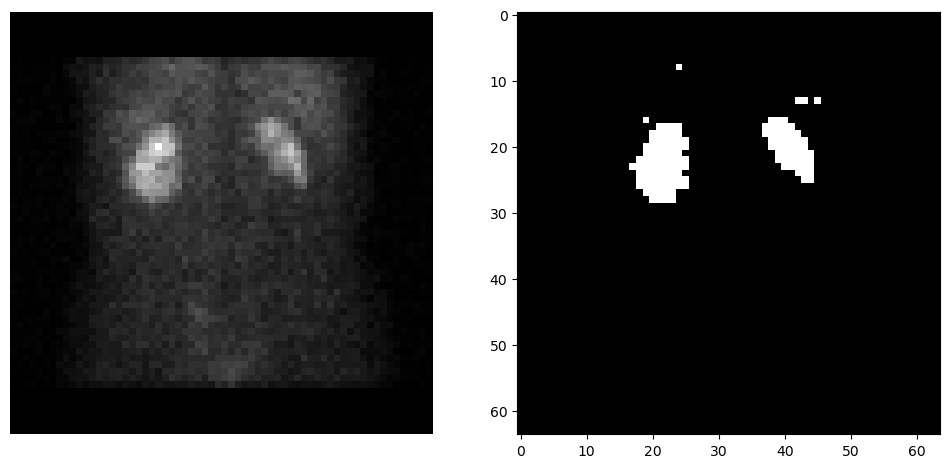

In [4]:
plt.figure(figsize=(12, 6))


ax = plt.subplot(121)
# 先 48 然后 46
# img2d = np.sum(img_arr[38: 48], axis=0)
img2d = np.sum(img_arr[38: 46], axis=0)
plt.imshow(img2d, cmap='gray')
# plt.colorbar()
ax.set_axis_off()


mask = np.zeros_like(img2d)
mask[img2d > 100] = 1
plt.subplot(122)
plt.imshow(mask, cmap='gray')
ax.set_axis_off()

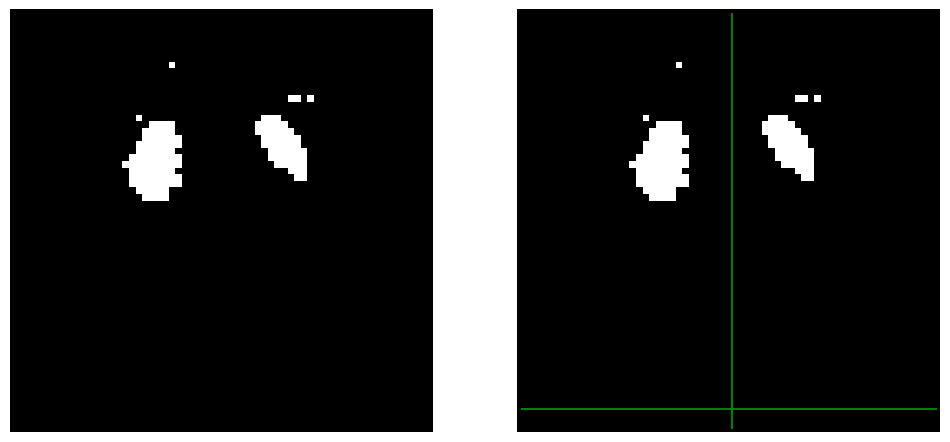

In [5]:
plt.figure(figsize=(12, 6))

mask = np.zeros_like(img2d)
mask[img2d > 100] = 1
ax = plt.subplot(121)
plt.imshow(mask, cmap='gray')
ax.set_axis_off()

mask = np.zeros_like(img2d)
mask[img2d > 100] = 1
ax = plt.subplot(122)
plt.imshow(mask, cmap='gray')
ax.set_axis_off()

plt.hlines(60, 0, 63, colors='g')
plt.vlines(32, 0, 63, colors='g')

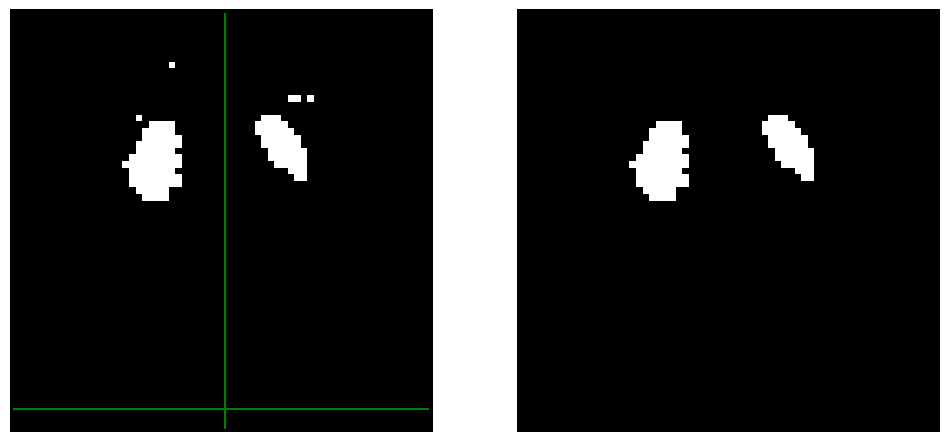

In [6]:
import numpy as np
from scipy.ndimage import label, sum as ndi_sum

def keep_largest_connected_component(binary_array):
    # 计算连通域
    labeled_array, num_features = label(binary_array)
    
    if num_features == 0:
        return binary_array  # 如果没有连通域，直接返回原数组
    
    # 计算每个连通域的大小
    sizes = ndi_sum(binary_array, labeled_array, index=np.arange(1, num_features + 1))
    
    # 找到最大连通域的索引
    largest_label = np.argmax(sizes) + 1  # +1 因为 label 索引从 1 开始
    
    # 保留最大连通域
    return labeled_array == largest_label


mask_left = mask.copy()
mask_left[:, 32:] = 0
mask_right = mask.copy()
mask_right[:, :32] = 0

largest_component_left = keep_largest_connected_component(mask_left)
largest_component_right = keep_largest_connected_component(mask_right)

# print(largest_component.astype(int))  # 转换为 0/1 方便查看

# plt.imshow(largest_component_left+largest_component_right, cmap='gray')

plt.figure(figsize=(12, 6))


mask = np.zeros_like(img2d)
mask[img2d > 100] = 1
ax = plt.subplot(121)
plt.imshow(mask, cmap='gray')
ax.set_axis_off()

plt.hlines(60, 0, 63, colors='g')
plt.vlines(32, 0, 63, colors='g')



# mask = np.zeros_like(img2d)
# mask[img2d > 100] = 1
ax = plt.subplot(122)
plt.imshow(largest_component_left+largest_component_right, cmap='gray')
ax.set_axis_off()

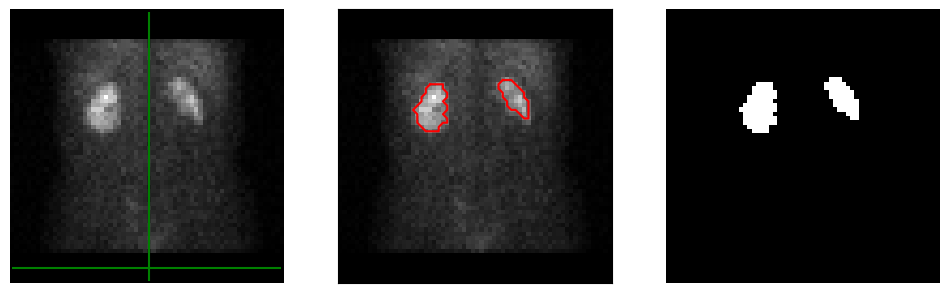

In [7]:
# 把 mask 转为轮廓线

import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

def mask_to_ice_flower_contour(mask):
    # 确保 mask 是二值图
    mask = mask.astype(np.uint8) * 255
    
    # 获取轮廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 冰花颜色（淡蓝色）
    ice_color = "r"

    # 画轮廓
    for contour in contours:
        contour = contour.squeeze()  # 去掉冗余维度
        if len(contour.shape) == 2:  # 避免空轮廓
            contour = np.vstack([contour, contour[0]])
            ax.plot(contour[:, 0], contour[:, 1], color=ice_color, linewidth=1.5)


plt.figure(figsize=(12, 6))


ax = plt.subplot(131)
plt.imshow(img2d, cmap='gray')
ax.set_axis_off()

plt.hlines(60, 0, 63, colors='g')
plt.vlines(32, 0, 63, colors='g')


ax = plt.subplot(132)

plt.imshow(img2d, cmap='gray')
mask_to_ice_flower_contour(largest_component_left+largest_component_right)

# mask = np.zeros_like(img2d)
# mask[img2d > 100] = 1
ax = plt.subplot(133)
plt.imshow(largest_component_left+largest_component_right, cmap='gray')
ax.set_axis_off()

(64, 64)


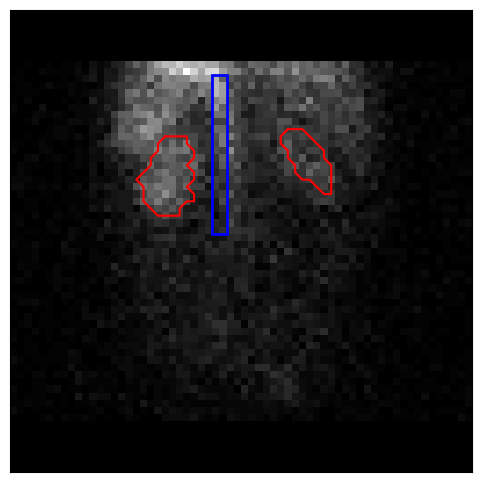

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 假设 img_arr 是一个 3D 数组
# img_arr = np.random.rand(15, 100, 100)  # 生成示例数据
imng2d_flow = np.sum(img_arr[0:15], axis=0)
print(imng2d_flow.shape)

# 创建图像
plt.figure(figsize=(6, 6))
plt.imshow(imng2d_flow, cmap='gray')

# 获取当前 Axes
ax = plt.gca()

# 添加红色矩形 (左下角x, 左下角y, 宽度, 高度)
rect1 = patches.Rectangle((27.5, 8.5), 2, 22, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect1)

# 添加绿色矩形 (左下角x, 左下角y, 宽度, 高度)
# rect2 = patches.Rectangle((0, 0), 32, 60, linewidth=2, edgecolor='g', facecolor='none')
# ax.add_patch(rect2)

# plt.imshow(largest_component_left+largest_component_right, cmap='gray')

mask_to_ice_flower_contour(largest_component_left+largest_component_right)
# 显示图像
plt.show()


255 0


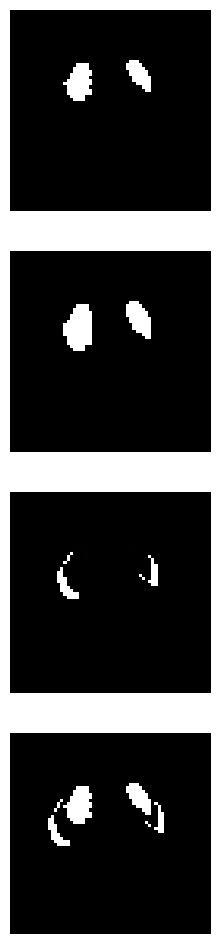

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 膨胀掩模
renal_mask_right = largest_component_right.astype(np.uint8) * 255
renal_mask_left = largest_component_left.astype(np.uint8) * 255
# dilate_mask(renal_mask, kernel_size=(3,3), iterations=2)

dilated_mask_right = cv2.dilate(renal_mask_right, (2,2), iterations=2)
dilated_mask_left = cv2.dilate(renal_mask_left, (3,3), iterations=3)

from scipy.ndimage import shift
shift_dilated_mask_right = shift(dilated_mask_right, (2, 2), cval=0)
shift_dilated_mask_left = shift(dilated_mask_left, (2, -2), cval=0)


plt.figure(figsize=(6, 12))

ax = plt.subplot(411)
plt.imshow(renal_mask_right+renal_mask_left, cmap='gray')
ax.set_axis_off()

ax = plt.subplot(412)
ax.set_axis_off()
plt.imshow(dilated_mask_right+dilated_mask_left, cmap='gray')


ax = plt.subplot(413)
ax.set_axis_off()

diff_right = np.maximum(shift_dilated_mask_right - dilated_mask_right, 0)
diff_left = np.maximum(shift_dilated_mask_left - dilated_mask_left, 0)
plt.imshow(diff_right+diff_left, cmap='gray')
# plt.colorbar()


diff_right2 = shift(diff_right, (2, 2), cval=0)
diff_left2 = shift(diff_left, (2, -3), cval=0)

ax = plt.subplot(414)
ax.set_axis_off()
plt.imshow(diff_right2/2 + renal_mask_right/2 + diff_left2/2+renal_mask_left/2, cmap='gray')

print(renal_mask_right.max(), renal_mask_right.min())



600577940
(1, 64, 64) (1, 64, 64)
601335054
(1, 64, 64) (1, 64, 64)
601342398
(1, 64, 64) (1, 64, 64)
601341657
(1, 64, 64) (1, 64, 64)
601334263
(1, 64, 64) (1, 64, 64)
601066497
(1, 64, 64) (1, 64, 64)


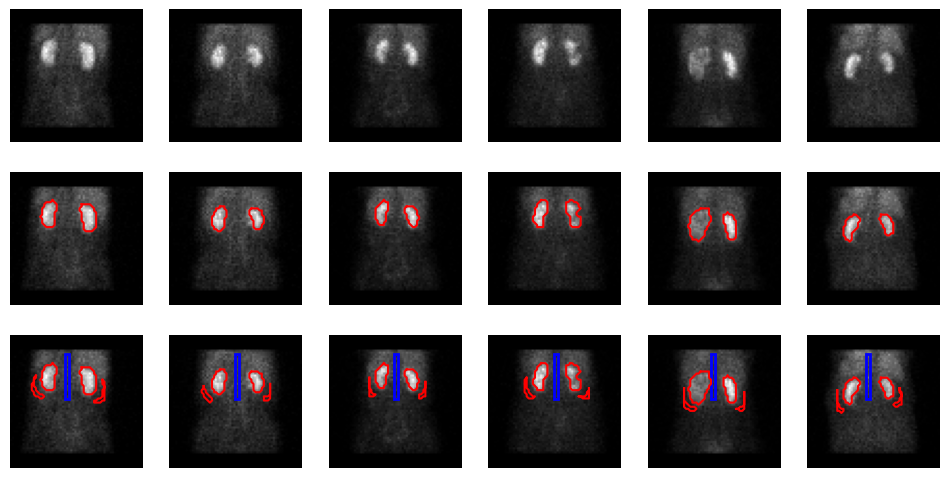

In [15]:
base_dir = r"D:\workspace\SPECT_project\GFR\Dataset099_Kidney"

test_list = [
"600577940",
"601335054",
"601342398",
"601341657",
"601334263",
"601066497",]

# test_list = [
# "000002596",
# "000068671",
# # "601342398",
# # "601341657",
# # "601334263",
# # "601066497"
# ]


nb_wid = len(test_list)
nb_height = 3
plt.figure(figsize=(12, 6))
for row_id, pid in enumerate(test_list, start=1):
    print(pid)
    sitk_img = sitk.ReadImage(os.path.join(base_dir, "imagesTs", f"{pid}_float32_0000.nii.gz"))
    # sitk_img = sitk.ReadImage(os.path.join(base_dir, "imagesTr", f"{pid}_0000.nii.gz"))
    img_arr = sitk.GetArrayFromImage(sitk_img)
    img2d = img_arr[0]

    sitk_mask = sitk.ReadImage(os.path.join(base_dir, "labelsTs", f"{pid}.nii.gz"))
    # sitk_mask = sitk.ReadImage(os.path.join(base_dir, "labelsTr", f"{pid}.nii.gz"))
    mask = sitk.GetArrayFromImage(sitk_mask)
    mask2d = mask[0]

    print(img_arr.shape, mask.shape)


    ax = plt.subplot(nb_height,nb_wid,row_id)
    plt.imshow(img2d, cmap='gray')
    ax.set_axis_off()

    ax = plt.subplot(nb_height,nb_wid,nb_wid+row_id)
    ax.set_axis_off()
    plt.imshow(img2d, cmap='gray')

    mask2d_bak = mask2d.copy()
    filt1 = mask2d_bak==1
    mask2d_bak[filt1] = 0
    filt3 = mask2d_bak==4
    mask2d_bak[filt3] = 0
    mask_to_ice_flower_contour(mask2d_bak)
    

    
    ax = plt.subplot(nb_height,nb_wid,nb_wid*2+row_id)
    ax.set_axis_off()
    plt.imshow(img2d, cmap='gray')
    # plt.imshow(mask2d, cmap='gray')
    mask_to_ice_flower_contour(mask2d)

    # ax = plt.gca()

    # 添加红色矩形 (左下角x, 左下角y, 宽度, 高度)
    y, x  = np.where(mask2d==2)
    cx1 = np.mean(x)
    cy1 = np.mean(y)
    y, x  = np.where(mask2d==3)
    cx2 = np.mean(x)
    cy2 = np.mean(y)
    # print(cx, cy)
    # filt3 = mask2d==3
    # y, x = np.nonzero(mask2d_bak[])
    rect1 = patches.Rectangle(((cx1+cx2)//2-1., 8.5), 2, 22, linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect1)
    
    # break

600577940
(1, 64, 64) (1, 64, 64)
601335054
(1, 64, 64) (1, 64, 64)
601342398
(1, 64, 64) (1, 64, 64)
601341657
(1, 64, 64) (1, 64, 64)
601334263
(1, 64, 64) (1, 64, 64)
601066497
(1, 64, 64) (1, 64, 64)


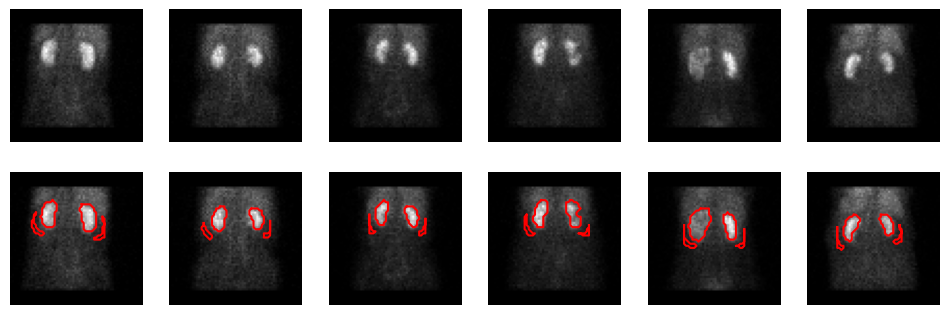

In [16]:
base_dir = r"D:\workspace\SPECT_project\GFR\Dataset099_Kidney"

test_list = [
"600577940",
"601335054",
"601342398",
"601341657",
"601334263",
"601066497",]

# test_list = [
# "000002596",
# "000068671",
# # "601342398",
# # "601341657",
# # "601334263",
# # "601066497"
# ]


nb_wid = len(test_list)
nb_height = 3
plt.figure(figsize=(12, 6))
for row_id, pid in enumerate(test_list, start=1):
    print(pid)
    sitk_img = sitk.ReadImage(os.path.join(base_dir, "imagesTs", f"{pid}_float32_0000.nii.gz"))
    # sitk_img = sitk.ReadImage(os.path.join(base_dir, "imagesTr", f"{pid}_0000.nii.gz"))
    img_arr = sitk.GetArrayFromImage(sitk_img)
    img2d = img_arr[0]

    sitk_mask = sitk.ReadImage(os.path.join(base_dir, "labelsTs", f"{pid}.nii.gz"))
    # sitk_mask = sitk.ReadImage(os.path.join(base_dir, "labelsTr", f"{pid}.nii.gz"))
    mask = sitk.GetArrayFromImage(sitk_mask)
    mask2d = mask[0]

    print(img_arr.shape, mask.shape)


    ax = plt.subplot(nb_height,nb_wid,row_id)
    plt.imshow(img2d, cmap='gray')
    ax.set_axis_off()

    # ax = plt.subplot(nb_height,nb_wid,nb_wid+row_id)
    # ax.set_axis_off()
    # plt.imshow(img2d, cmap='gray')

    # mask2d_bak = mask2d.copy()
    # filt1 = mask2d_bak==1
    # mask2d_bak[filt1] = 0
    # filt3 = mask2d_bak==4
    # mask2d_bak[filt3] = 0
    # mask_to_ice_flower_contour(mask2d_bak)
    

    
    ax = plt.subplot(nb_height,nb_wid,nb_wid*1+row_id)
    ax.set_axis_off()
    plt.imshow(img2d, cmap='gray')
    # plt.imshow(mask2d, cmap='gray')
    mask_to_ice_flower_contour(mask2d)

    # ax = plt.gca()

    # 添加红色矩形 (左下角x, 左下角y, 宽度, 高度)
    y, x  = np.where(mask2d==2)
    cx1 = np.mean(x)
    cy1 = np.mean(y)
    y, x  = np.where(mask2d==3)
    cx2 = np.mean(x)
    cy2 = np.mean(y)
    # print(cx, cy)
    # filt3 = mask2d==3
    # y, x = np.nonzero(mask2d_bak[])
    # rect1 = patches.Rectangle(((cx1+cx2)//2-1., 8.5), 2, 22, linewidth=2, edgecolor='b', facecolor='none')
    # ax.add_patch(rect1)
    
    # break

In [11]:
file_path = r"D:\workspace\SPECT_project\GFR\Dataset099_Kidney\labelsTr\301392369.nii.gz"
label_file = r"D:\workspace\SPECT_project\GFR\Dataset099_Kidney\labelsTs\600012106.nii.gz"

sitk_img = sitk.ReadImage(label_file)
img_arr = sitk.GetArrayFromImage(sitk_img)
print(img_arr.shape, img_arr.max(), img_arr.min())

(1, 64, 64) 4 0


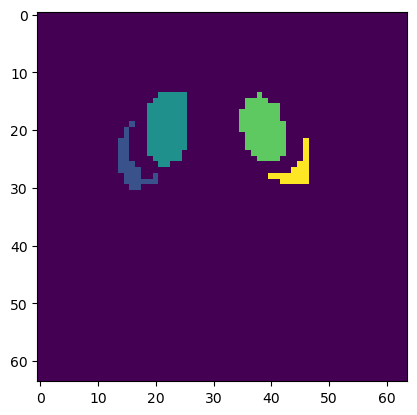

In [12]:
plt.imshow(img_arr[0])